<a href="https://colab.research.google.com/github/ParsaKeerthana/Clustering-Assignment/blob/main/f)_Illustrate_clustering_of_timeseries_data_using_pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


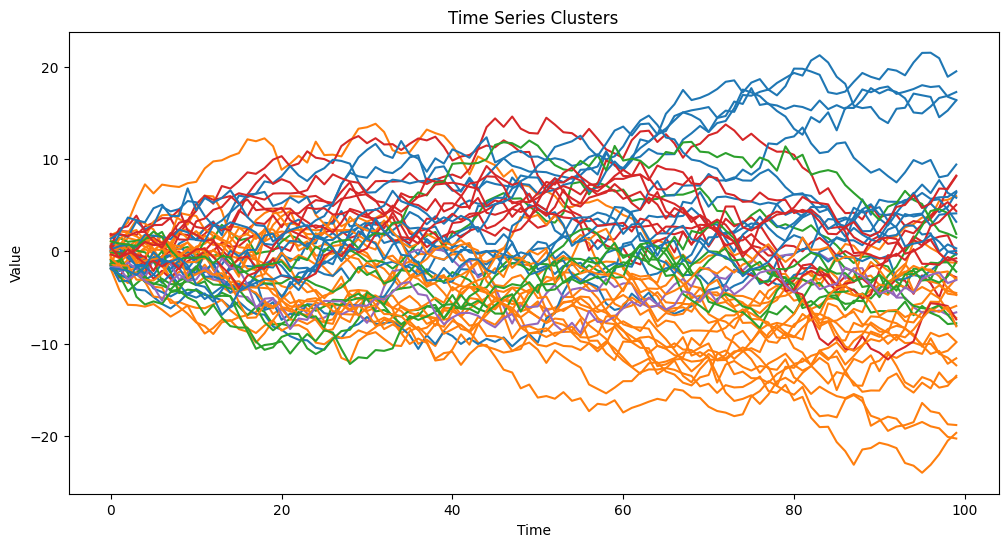

In [1]:

# Step 1: Import necessary libraries
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Generate Synthetic Time Series Data
np.random.seed(0)
time_points = 100  # Number of time points in each series
num_series = 50  # Number of time series

# Generate random walk time series data
time_series_data = np.cumsum(np.random.randn(num_series, time_points), axis=1)

# Step 3: Feature Extraction
def extract_features(time_series):
    # Ensure the time_series is a 2D array before standardization
    time_series = np.atleast_2d(time_series)
    standardized_series = (time_series - np.mean(time_series, axis=1, keepdims=True)) / np.std(time_series, axis=1, keepdims=True)
    return standardized_series

# Apply feature extraction to each time series
features = np.array([extract_features(ts) for ts in time_series_data])
features = features.reshape(num_series, -1)  # Reshape for clustering
# Step 4: Clustering with K-Means
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)
labels = kmeans.labels_

# Step 5: Visualization of Clusters
plt.figure(figsize=(12, 6))
for i, label in enumerate(labels):
    plt.plot(time_series_data[i], c=f'C{label}')

plt.title('Time Series Clusters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()